In [25]:
!pip install pandas numpy matplotlib seaborn scikit-learn missingno

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [27]:
# 데이터 불러오기
train = pd.read_csv('./csv/house_prices/train.csv')
test = pd.read_csv('./csv/house_prices/test.csv')

# 데이터 기본 정보 확인
print(train.shape)
print(train.info())
print(train.describe())

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

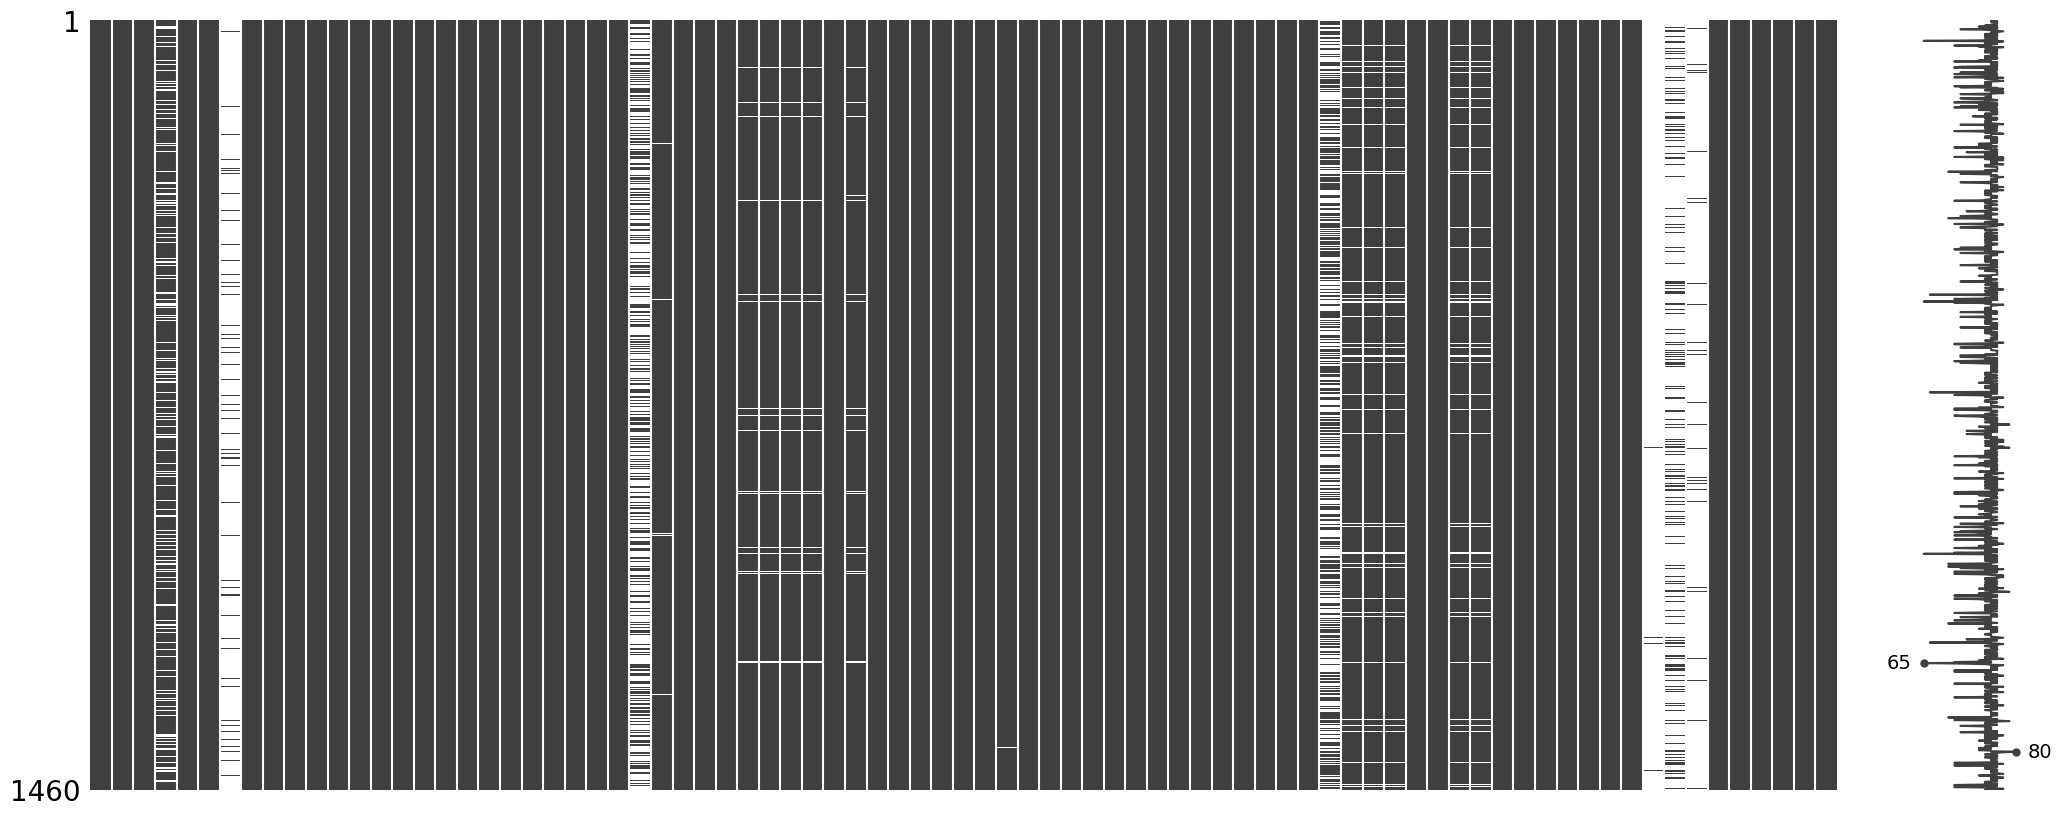

In [28]:
# 결측치 시각화
import missingno as msno
msno.matrix(train)
plt.show()

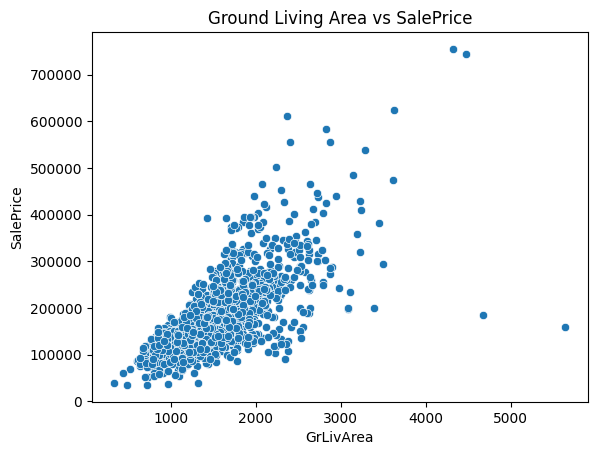

In [29]:
# 주요 feature와 SalePrice 간의 관계 시각화
# 지상층 면적(GrLivArea) vs 집값(SalePrice)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)
plt.title('Ground Living Area vs SalePrice')
plt.show()

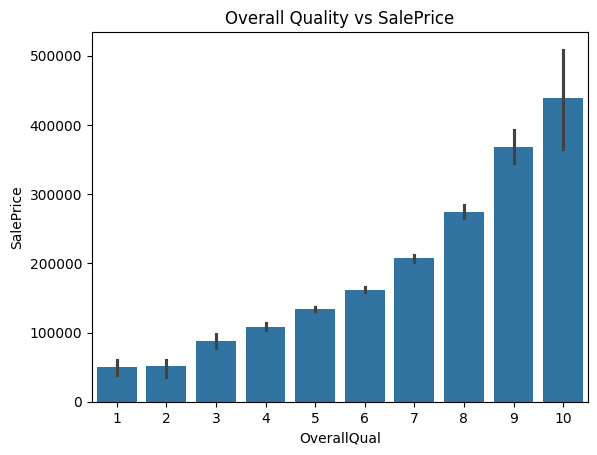

In [30]:
# 전반적인 품질(OverallQual) vs 집값
sns.barplot(x='OverallQual', y='SalePrice', data=train)
plt.title('Overall Quality vs SalePrice')
plt.show()

In [31]:
# 간단한 전처리 (결측치 채우기, 범주형 변수 인코딩)
# LotFrontage (도로 길이) 평균값으로 채우기
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())

# MasVnrType (외벽 재질 종류) 결측치는 'None'으로 채우기
train['MasVnrType'] = train['MasVnrType'].fillna('None')
test['MasVnrType'] = test['MasVnrType'].fillna('None')

# MasVnrArea (외벽 면적) 결측치는 0으로 채우기
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)
test['MasVnrArea'] = test['MasVnrArea'].fillna(0)

# GarageType (차고 종류) 결측치는 'None'으로 채우기
train['GarageType'] = train['GarageType'].fillna('None')
test['GarageType'] = test['GarageType'].fillna('None')

In [32]:
# 범주형 컬럼을 숫자로 변환
train['GarageFinish'] = train['GarageFinish'].map(
    {'Unf': 0, 'RFn': 1, 'Fin': 2, np.nan: -1})

In [33]:
# 사용할 Feature 선택
features = ['OverallQual', 'GrLivArea', 'GarageCars',
            'TotalBsmtSF', 'FullBath', 'YearBuilt']
X = train[features]
y = train['SalePrice']

In [34]:
# 학습/검증 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [35]:
# 랜덤 포레스트 회귀 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [36]:
# 검증 데이터로 성능 평가
y_pred = model.predict(X_val)
# RMSE (Root Mean Squared Error) 계산
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f'Validation RMSE: {rmse:.2f}')

Validation RMSE: 28943.62


In [37]:
# 최종 제출 파일 생성
X_test = test[features]

test_pred = model.predict(X_test)

submission = pd.DataFrame({
    'Id': test['Id'],
    'SalePrice': test_pred
})

submission.to_csv('submission.csv', index=False)